In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as numpy
import pandas as pd

In [5]:

# Load movies data
movies = pd.read_csv("/content/movie.csv")
print("Movies DataFrame loaded. Shape:", movies.shape)
print(movies.head())



Movies DataFrame loaded. Shape: (27278, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [6]:
# Load ratings data
ratings = pd.read_csv('/content/rating.csv')
print("Ratings DataFrame loaded. Shape:", ratings.shape)
print(ratings.head())

Ratings DataFrame loaded. Shape: (1075214, 4)
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40


In [7]:
# Check for missing values
print("Missing values in movies DataFrame:\n", movies.isnull().sum())
print("Missing values in ratings DataFrame:\n", ratings.isnull().sum())

Missing values in movies DataFrame:
 movieId    0
title      0
genres     0
dtype: int64
Missing values in ratings DataFrame:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [8]:
# Merge datasets on movieId
data = pd.merge(ratings, movies, on='movieId')
print("Merged DataFrame loaded. Shape:", data.shape)
print(data.head())

Merged DataFrame loaded. Shape: (1075214, 6)
   userId  movieId  rating            timestamp           title  \
0       1        2     3.5  2005-04-02 23:53:47  Jumanji (1995)   
1       5        2     3.0  1996-12-25 15:26:09  Jumanji (1995)   
2      13        2     3.0  1996-11-27 08:19:02  Jumanji (1995)   
3      29        2     3.0  1996-06-23 20:36:14  Jumanji (1995)   
4      34        2     3.0  1996-10-28 13:29:44  Jumanji (1995)   

                       genres  
0  Adventure|Children|Fantasy  
1  Adventure|Children|Fantasy  
2  Adventure|Children|Fantasy  
3  Adventure|Children|Fantasy  
4  Adventure|Children|Fantasy  


step2

Basic Statistics and Summary:

In [9]:
# Summary statistics of the ratings
print(data['rating'].describe())

count    1.075214e+06
mean     3.528293e+00
std      1.051975e+00
min      5.000000e-01
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [10]:
# Number of unique users and movies
print("Number of unique users:", data['userId'].nunique())
print("Number of unique movies:", data['movieId'].nunique())

Number of unique users: 7321
Number of unique movies: 14177


Visualizations:
We'll use matplotlib and seaborn for visualizations.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

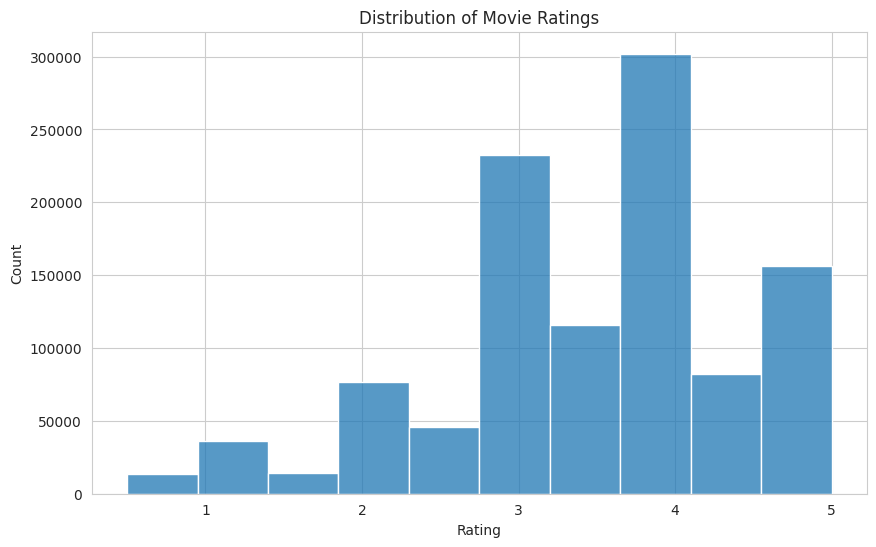

In [12]:
# Set plot style
sns.set_style('whitegrid')

# Distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=10, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



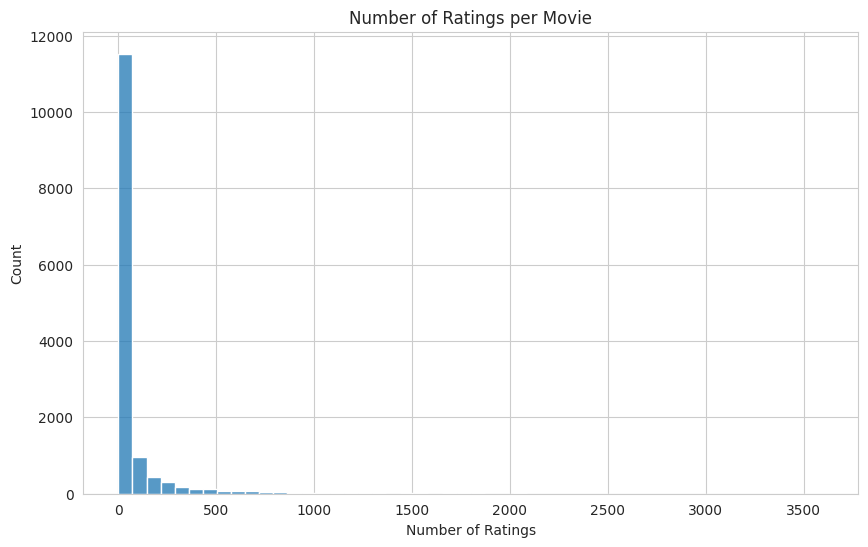

In [13]:
# Set plot style
sns.set_style('whitegrid')

# Number of ratings per movie
ratings_per_movie = data.groupby('title')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=50, kde=False)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

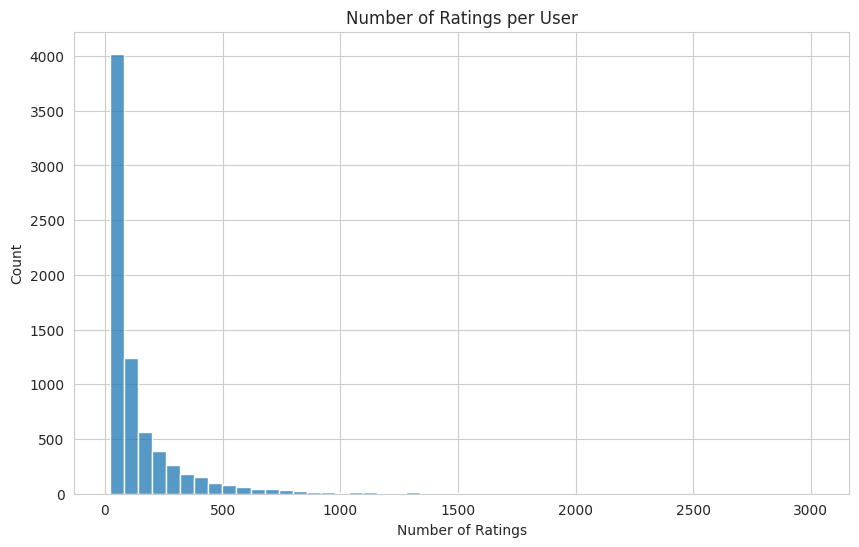

In [14]:
# Set plot style
sns.set_style('whitegrid')

# Number of ratings per user
ratings_per_user = data.groupby('userId')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=False)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()


Checking for Duplicates:
Ensure that there are no duplicate entries in the dataset.

In [15]:
# Check for duplicates
duplicates = data.duplicated(subset=['userId', 'movieId', 'rating', 'timestamp'])
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [16]:
# Drop duplicates if any
data = data.drop_duplicates(subset=['userId', 'movieId', 'rating', 'timestamp'])
print("Shape of data after removing duplicates:", data.shape)

Shape of data after removing duplicates: (1075214, 6)


Collaborative Filtering,
Content-Based Filtering

1. Collaborative Filtering:
Collaborative filtering can be divided into two types:

User-based Collaborative Filtering: Recommends items that similar users have liked.
Item-based Collaborative Filtering: Recommends items that are similar to items the user has liked.

In [17]:
!pip install scikit-surprise

Building the Collaborative Filtering Model:

In [18]:
'''Using the Surprise Library
The Surprise library is designed for building and analyzing recommender systems that deal with explicit rating data. It's particularly useful for collaborative filtering tasks. Here’s why we use it:

Ease of Use: Surprise provides a simple and intuitive API for building recommendation models.
Built-in Algorithms: It comes with several built-in algorithms like SVD, KNN, and others that are commonly used in collaborative filtering.
Performance Metrics: It includes tools for evaluating the performance of these algorithms using metrics like RMSE and MAE.
Dataset Handling: Surprise has utilities for loading and splitting datasets, which makes it easier to manage data.'''
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

# Load the dataset into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use the SVD algorithm (a matrix factorization technique)
algo = SVD()

# Train the algorithm on the trainset
algo.fit(trainset)

# Predict ratings for the testset
predictions = algo.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


RMSE: 0.8327
RMSE: 0.8327209503562578


2. Content-Based Filtering:
Content-based filtering recommends items by comparing the content of items and a profile of the user's preferences. For movies, the content can be the genre, title, description, etc.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Create a TF-IDF matrix of movie genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get movie recommendations based on cosine similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = movies[movies['title'] == title].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

# Example: Get recommendations for a movie
print(get_recommendations('Toy Story (1995)'))


2209                                           Antz (1998)
3027                                    Toy Story 2 (1999)
3663        Adventures of Rocky and Bullwinkle, The (2000)
3922                      Emperor's New Groove, The (2000)
4790                                 Monsters, Inc. (2001)
10114    DuckTales: The Movie - Treasure of the Lost La...
10987                                     Wild, The (2006)
11871                               Shrek the Third (2007)
13337                       Tale of Despereaux, The (2008)
18274    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object
